### Simple Scikit-learn Logistic Regression demonstration

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
# from sklearn import metrics

import numpy as np

import matplotlib.pyplot as plt

In [2]:
digitDataSet = load_digits()
digitDataSet.data.shape

(1797, 64)

In [3]:
digitDataSet.target[1790:]

array([8, 4, 9, 0, 8, 9, 8])

In [4]:
tuple(zip(digitDataSet.data[0:10], digitDataSet.target[0:10]))

((array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
         15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
         12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
          0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
         10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
  0),
 (array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
          9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
         15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
          0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
         16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]),
  1),
 (array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
         14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
          1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
          0.,  0.,  9., 16., 16.

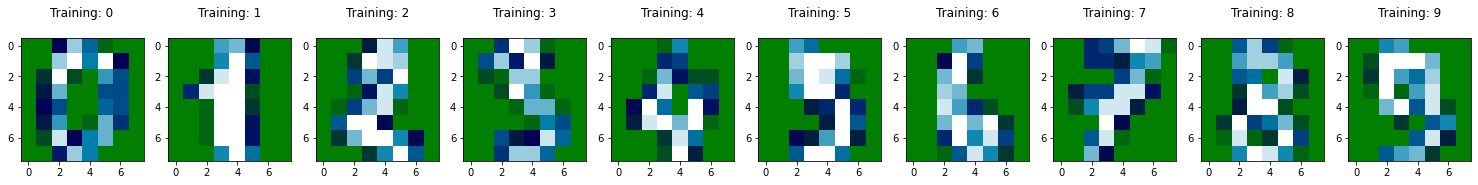

In [5]:
plt.figure(figsize=(26,6))
for i, (img, label) in enumerate(zip(digitDataSet.data[0:10], digitDataSet.target[0:10])):
    plt.subplot(1, 10, i + 1)
    plt.imshow(np.reshape(img, (8, 8)), cmap=plt.cm.ocean)
    plt.title(f"Training: {label}\n", fontsize=12)

In [202]:
from random import randint
trainData, testData, trainLabels, testLabels = train_test_split(digitDataSet.data, digitDataSet.target, test_size=0.25, random_state=randint(0, 100))
print(f"Train set size: {trainLabels.shape[0]}\nTest set size: {testLabels.shape[0]}")

Train set size: 1347
Test set size: 450


In [203]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100, solver="liblinear")
lr.fit(trainData, trainLabels)

LogisticRegression(solver='liblinear')

In [204]:
predictions = lr.predict(testData)
targetTestLabels = testLabels
""" import math
startIndex = math.ceil(len(digitDataSet.data)/2)
targetTestData = digitDataSet.data[startIndex:]
targetTestLabels = digitDataSet.target[startIndex]
predictions = lr.predict(targetTestData) """
""" targetTestLabels = trainLabels
predictions = lr.predict(trainData) """
correct = 0
misses = 0
for i in range(len(predictions)):
    if (predictions[i] == targetTestLabels[i]):
        correct += 1
    else:
        misses += 1
print(f"Correct: {correct}\nMisses: {misses}")
print(f"Miss pct: {round(misses/len(predictions)*100, 2)}%")

Correct: 433
Misses: 17
Miss pct: 3.78%
